In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../../data/cancer.csv')
df.head()

,outcome,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df['outcome'] = df['outcome'].replace(to_replace={'B':0, 'M':1})

In [4]:
X = df.drop(columns=['outcome'])
y = df['outcome'] 

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 45)

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [7]:
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.37942582, 0.08259567, 0.40955836, 0.35704453, 0.09250747,
       0.23171735, 0.37424329, 0.47295007, 0.07898518, 0.01990975,
       0.24834544, 0.        , 0.27130465, 0.35648809, 0.04478073,
       0.07098645, 0.14947508, 0.14410192, 0.0128264 , 0.04300596,
       0.44520225, 0.10684539, 0.47327832, 0.4629782 , 0.12470321,
       0.23780503, 0.3206053 , 0.45039411, 0.11120587, 0.05040804])

In [8]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

perimeter_worst            0.473278
concave points_mean        0.472950
area_worst                 0.462978
concave points_worst       0.450394
radius_worst               0.445202
perimeter_mean             0.409558
radius_mean                0.379426
concavity_mean             0.374243
area_mean                  0.357045
area_se                    0.356488
concavity_worst            0.320605
perimeter_se               0.271305
radius_se                  0.248345
compactness_worst          0.237805
compactness_mean           0.231717
concavity_se               0.149475
concave points_se          0.144102
smoothness_worst           0.124703
symmetry_worst             0.111206
texture_worst              0.106845
smoothness_mean            0.092507
texture_mean               0.082596
symmetry_mean              0.078985
compactness_se             0.070986
fractal_dimension_worst    0.050408
smoothness_se              0.044781
fractal_dimension_se       0.043006
fractal_dimension_mean     0

<AxesSubplot:>

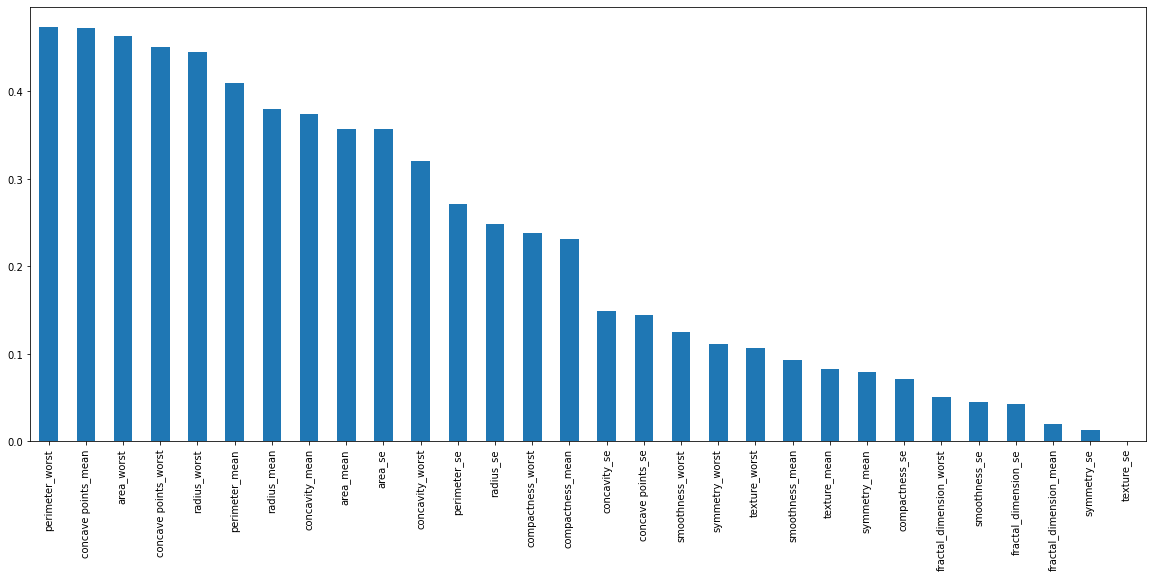

In [9]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [10]:
# will only select top 15 features
sel_cols = SelectKBest(mutual_info_classif, k=15)
sel_cols.fit(x_train, y_train)

x_train.columns[sel_cols.get_support()], x_test.columns[sel_cols.get_support()]

(Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
        'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
        'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
        'compactness_worst', 'concavity_worst', 'concave points_worst'],
       dtype='object'),
 Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
        'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
        'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
        'compactness_worst', 'concavity_worst', 'concave points_worst'],
       dtype='object'))

In [11]:
x_train = x_train[x_train.columns.intersection(x_train.columns[sel_cols.get_support()])]
x_test  = x_test[x_test.columns.intersection(x_test.columns[sel_cols.get_support()])]

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, bootstrap = True, max_features = 'sqrt').fit(x_train,y_train)

y_pred = model.predict(x_test)
print('accuracy of the model is : {:.2f}'.format(model.score(x_test, y_test)))

accuracy of the model is : 0.94


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        57
           1       0.96      0.86      0.91        29

    accuracy                           0.94        86
   macro avg       0.95      0.92      0.93        86
weighted avg       0.94      0.94      0.94        86



In [14]:
y_pred = pd.DataFrame(model.predict(x_test),columns=['pred'], index=x_test.index)

In [15]:
from shapash.explainer.smart_explainer import SmartExplainer
xpl = SmartExplainer()
xpl.compile(
    x=x_test,
    model=model,
    y_pred=y_pred
   
)

Backend: Shap TreeExplainer


In [16]:

xpl.save('../../../serialized_files/shapash/cancer/cancer_xpl.pkl')

In [17]:
summary_df = xpl.to_pandas(max_contrib=3)
summary_df.head()

,pred,feature_1,value_1,contribution_1,feature_2,value_2,contribution_2,feature_3,value_3,contribution_3
440,0,concave points_mean,0.03613,0.122393,concave points_worst,0.1555,-0.100025,area_worst,476.4,0.085566
262,1,area_worst,1295.0,0.133488,radius_worst,20.39,0.112556,perimeter_worst,137.9,0.098993
260,1,area_worst,1844.0,0.114396,concave points_mean,0.09333,0.095405,radius_worst,24.33,0.094269
145,0,area_worst,509.6,0.066665,concave points_mean,0.03003,0.060648,radius_worst,13.15,0.052548
504,0,area_worst,300.2,0.095657,radius_worst,10.28,0.077135,perimeter_worst,69.05,0.072063


In [18]:
xpl.plot.features_importance()

In [19]:
xpl.filter()
xpl.plot.local_plot(index=145)

In [20]:
predictor = xpl.to_smartpredictor()

In [21]:
predictor.save('../../../serialized_files/shapash/cancer/cancer.pkl')
from shapash.utils.load_smartpredictor import load_smartpredictor
predictor_load = load_smartpredictor('../../../serialized_files/shapash/cancer/cancer.pkl')

In [22]:
data = [10.970, 71.73, 371.5, 0.1113, 0.09457, 0.03613, 0.2574, 2.806, 18.15, 12.36, 90.14, 476.4, 0.4082, 0.4779, 0.15550]

In [23]:
# change the original dataframe
X  = X[X.columns.intersection(X.columns[sel_cols.get_support()])]
X.columns

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')

In [24]:
new_df = pd.DataFrame(columns = X.columns)
new_df.loc[len(X)] = data

In [25]:
X['outcome'] = y
X.head()


,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,outcome
0,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.6656,0.7119,0.2654,1
1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,158.80,1956.0,0.1866,0.2416,0.1860,1
2,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,152.50,1709.0,0.4245,0.4504,0.2430,1
3,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.8663,0.6869,0.2575,1
4,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.2050,0.4000,0.1625,1


In [26]:
# overwrite the original cancer file
X.to_csv('../../../data/cancer.csv', index=False)

In [27]:
new_df.reset_index(inplace = True, drop = True)

In [28]:
predictor.add_input(x=new_df)

In [29]:
detailed_contributions = predictor.detail_contributions()
detailed_contributions

,ypred,proba,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,0,0.82,0.012503,0.019239,0.000686,0.002276,-0.015576,0.122393,0.003344,0.001216,0.01709,0.063063,0.045427,0.085566,-0.023384,-0.034843,-0.100025


In [30]:
predictor.modify_mask(max_contrib=3)
explanation = predictor.summarize()
explanation

,ypred,proba,feature_1,value_1,contribution_1,feature_2,value_2,contribution_2,feature_3,value_3,contribution_3
0,0,0.82,concave points_mean,0.03613,0.122393,concave points_worst,0.1555,-0.100025,area_worst,476.4,0.085566


In [31]:
df = detailed_contributions.drop(['ypred','proba'], axis=1).T.reset_index()
df.columns= ['features','contribution']
df = df.sort_values(by='contribution', ascending=True)

In [32]:
import numpy as np
import plotly.graph_objects as go
from plotly.graph_objs import *

df["color"] = np.where(df["contribution"]<0, '#f4c000', '#4a628a')

fig = go.Figure(go.Bar(x=df['contribution'], 
                       y=df['features'],
                       orientation='h', 
                       marker_color=df['color']) 
               )
fig.update_layout(template='plotly_white', title="Local Explanation", title_x=0.5, xaxis_title="Contribution")
fig.show()